In [ ]:
# This section is about visualizing aggregate monthly trends in motor vehicle collisions,
# specifically focusing on the total number of injuries and fatalities. 
# The objective is to understand how these metrics vary across different months and years.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load file
file_path = '../injury_fatality/Injury_and_Fatality_Cleaned.csv'
agg_data = pd.read_csv(file_path)

In [3]:
# Convert CRASH DATE into datetime format
agg_data['CRASH DATE'] = pd.to_datetime(agg_data['CRASH DATE'])

# Extract month and year
agg_data['Year'] = agg_data['CRASH DATE'].dt.year
agg_data['Month'] = agg_data['CRASH DATE'].dt.month

In [31]:
# Groupby Year and Month to calculate total number of injury and death
monthly_yearly_trends = agg_data.groupby(['Year', 'Month']).agg(
    {'TOTAL_INJURED': 'sum', 'TOTAL_KILLED': 'sum'}
).reset_index()

# Mapping month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
monthly_yearly_trends['Month_Name'] = monthly_yearly_trends['Month'].map(month_names)

In [32]:
# Pivot table for injuries and deaths
pivot_injuries = monthly_yearly_trends.pivot(index='Month_Name', columns='Year', values='TOTAL_INJURED')
pivot_fatalities = monthly_yearly_trends.pivot(index='Month_Name', columns='Year', values='TOTAL_KILLED')


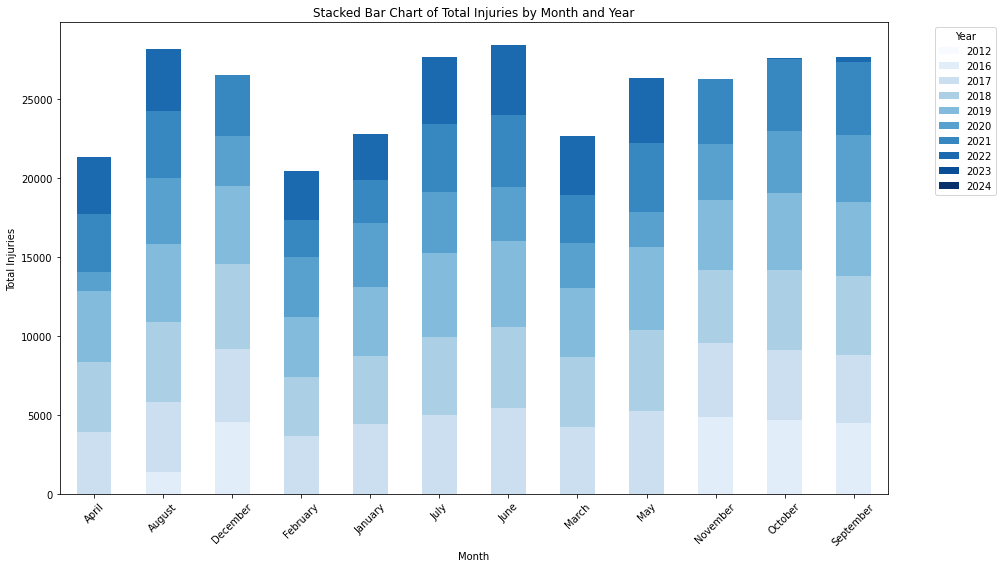

In [61]:
# Stacked Bar chart for Injuries
plt.figure(figsize=(14, 8))
pivot_injuries.plot(kind='bar', stacked=True, colormap='Blues', ax=plt.gca())
plt.title('Stacked Bar Chart of Total Injuries by Month and Year')
plt.xlabel('Month')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


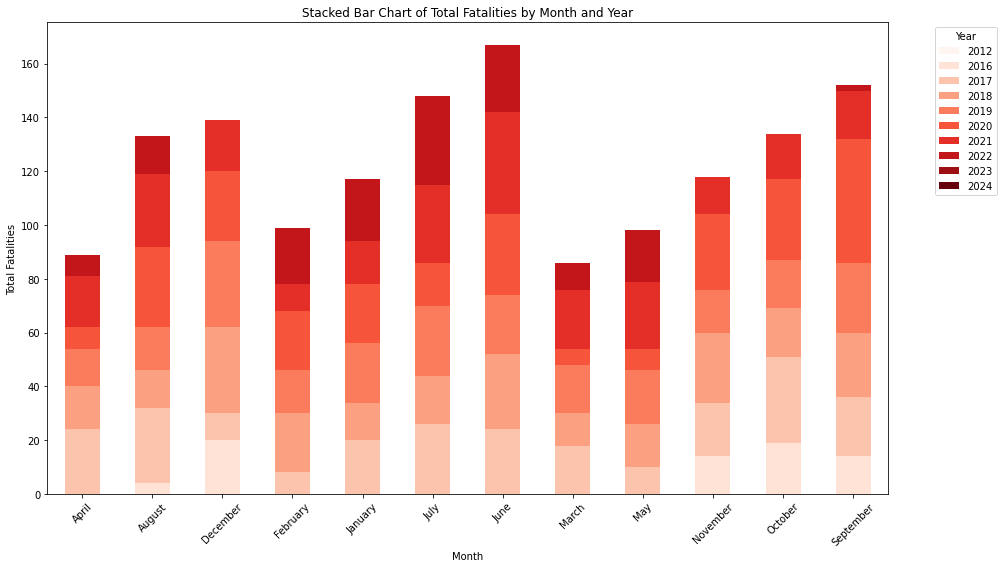

In [62]:
#Stacked Bar chart for Fatalities
plt.figure(figsize=(14, 8))
pivot_fatalities.plot(kind='bar', stacked=True, colormap='Reds', ax=plt.gca())
plt.title('Stacked Bar Chart of Total Fatalities by Month and Year')
plt.xlabel('Month')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()